## **DATA ANALYSIS PYTHON PROJECT- BLINKIT ANALYSIS**

#### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### **Importing Raw Data**

In [2]:
df = pd.read_csv(r"C:\Users\shubh\OneDrive\Desktop\cp project\data\BlinkIT Grocery Data.csv")

#### **Sample Data**

In [3]:
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Total Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


#### **Size of Data**

In [4]:
print("Size of Data:",df.shape)

Size of Data: (8523, 12)


#### **Information of data**

In [5]:
df.columns                              # Information of columns  present in our data

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Total Sales', 'Rating'],
      dtype='object')

In [6]:
df.dtypes                               # Data_types information

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Total Sales                  float64
Rating                       float64
dtype: object

In [7]:
print(df['Item Fat Content'].unique())       # Checking Unique values present in the specific columns

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


#### **Data Cleaning**

In [8]:
df['Item Fat Content'] = df['Item Fat Content'].str.replace('LF','Low Fat')
df['Item Fat Content'] = df['Item Fat Content'].str.replace('low fat','Low Fat')
df['Item Fat Content'] = df['Item Fat Content'].str.replace('reg','Regular')

In [9]:
print(df['Item Fat Content'].unique())   

['Regular' 'Low Fat']


### **BUSINESS REQUIREMENT**

#### **KPI's REQUIREMENT**

In [10]:
#Total Sales
total_sales = df['Total Sales'].sum()

#Average Sales
avg_sales = df['Total Sales'].mean(numeric_only = True)

#No. of Items Sold
Items_sold = df['Total Sales'].count()

#Average Rating
avg_rating = df['Rating'].mean(numeric_only = True)

#Diplaying all KPI's(Key Performance Indicator)

print(f"Total_sales: ${total_sales:,.1f}")
print(f"Average_sales: ${avg_sales:,.0f}")
print(f"Average_rating: {avg_rating:,.1f}")
print(f"No_of_Items_sold: {Items_sold:,.0f}")

Total_sales: $1,201,681.5
Average_sales: $141
Average_rating: 4.0
No_of_Items_sold: 8,523


### **CHARTS REQUIREMENT**

#### **Total Sales by Fat Content**

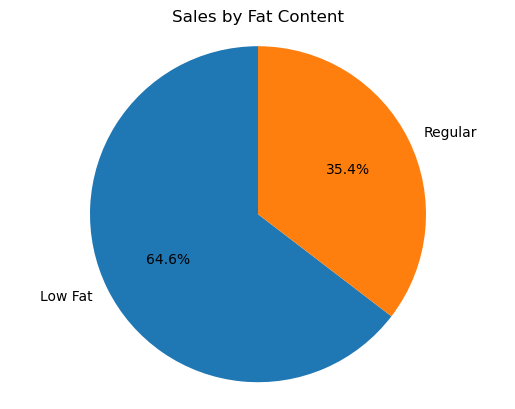

In [16]:
sales_by_fat = df.groupby("Item Fat Content")['Total Sales'].sum()

plt.pie(sales_by_fat, labels = sales_by_fat.index ,
                        autopct = '%.1f%%',
                        startangle = 90)
plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

#### **Total Sales by Item Type**

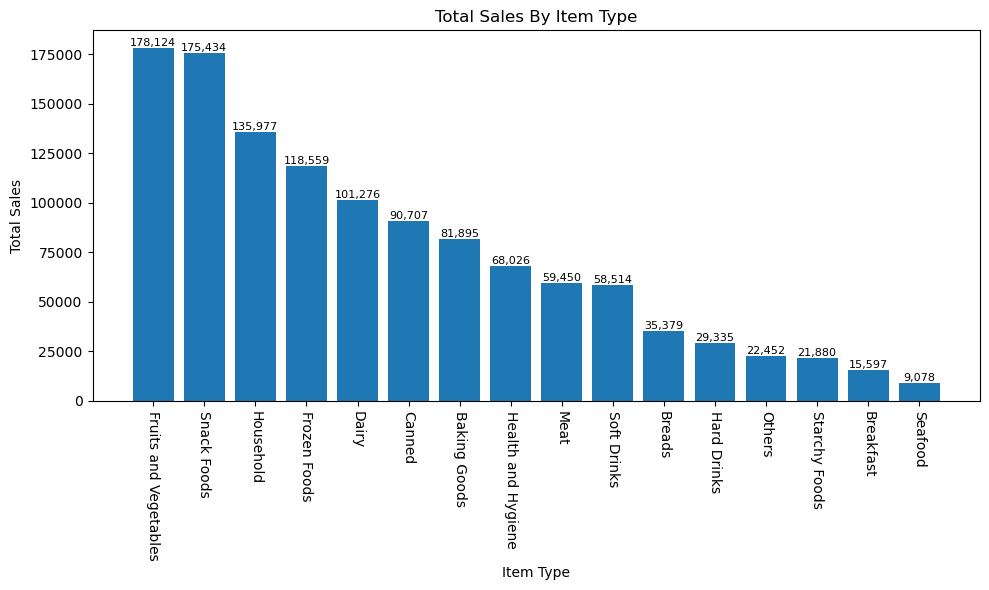

In [20]:
sales_by_type = df.groupby('Item Type')['Total Sales'].sum().sort_values(ascending = False)

plt.figure(figsize = (10,6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation = -90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales By Item Type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():,.0f}', ha = 'center', va ='bottom', fontsize = 8)

plt.tight_layout()
plt.show()


#### **Fat Content by Outlet for Total Sales**

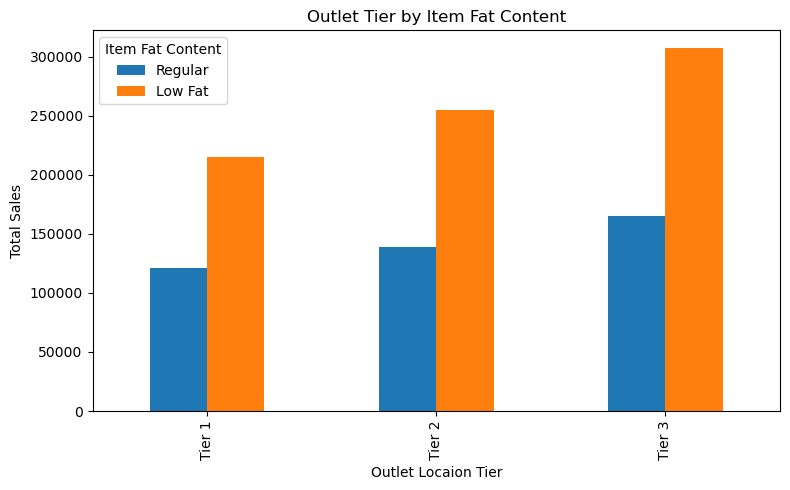

In [23]:
grouped = df.groupby(['Outlet Location Type','Item Fat Content'])['Total Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]

ax = grouped.plot(kind='bar', figsize=(8,5), title = 'Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Locaion Tier')
plt.ylabel('Total Sales')
plt.legend(title= 'Item Fat Content')
plt.tight_layout()
plt.show()

#### **Total Sales by Outlet Establishment**

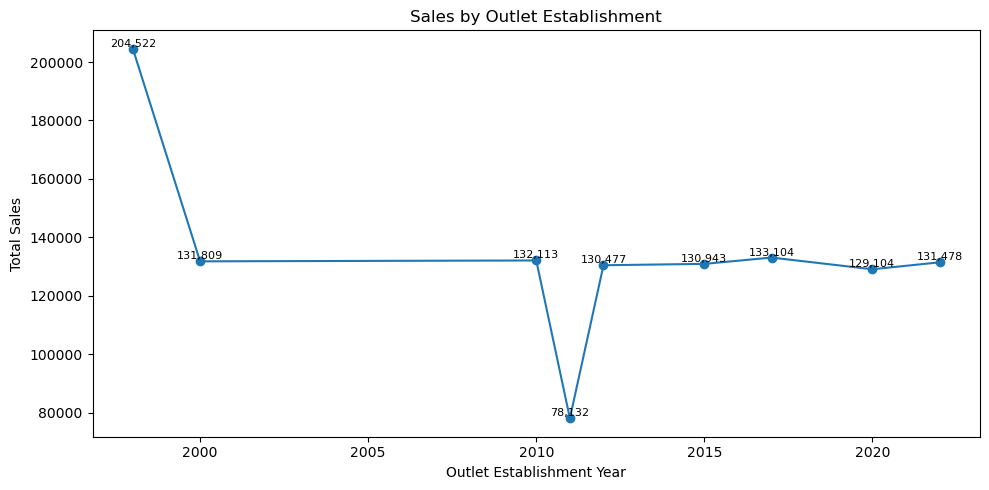

In [28]:
sales_by_year = df.groupby('Outlet Establishment Year')['Total Sales'].sum().sort_index()

plt.figure(figsize=(10,5))
plt.plot(sales_by_year.index, sales_by_year.values , marker = 'o', linestyle ='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Sales by Outlet Establishment')

for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x,y,f'{y:,.0f}', ha = 'center', va = 'bottom', fontsize = 8)

plt.tight_layout()
plt.show()

#### **Total Sales by Outlet Size**

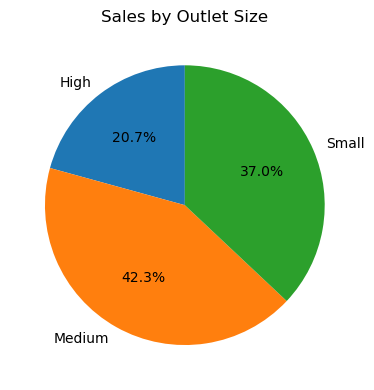

In [31]:
sales_by_size = df.groupby('Outlet Size')['Total Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels = sales_by_size.index ,
                        autopct = '%.1f%%',
                        startangle = 90)
plt.title('Sales by Outlet Size')
plt.tight_layout()
plt.show()

#### **Total Sales by Outlet Location**

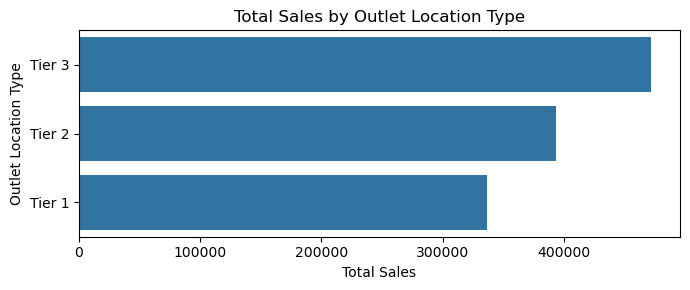

In [35]:
sales_by_location = df.groupby('Outlet Location Type')['Total Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Total Sales',ascending= False)

plt.figure(figsize=(7,3))
ax = sns.barplot(x='Total Sales', y='Outlet Location Type', data = sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()
plt.show()